In [10]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline


In [48]:
gld=pdr.get_data_yahoo('GLD','2016-11-08')
gld.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-11-07,122.709999,121.879997,122.660004,122.150002,10015000,122.150002
2016-11-08,123.089996,121.360001,122.120003,121.639999,9480600,121.639999
2016-11-09,124.349998,121.110001,124.300003,121.559998,18236500,121.559998
2016-11-10,121.540001,119.379997,121.519997,119.750000,22268000,119.750000
2016-11-11,119.690002,116.230003,119.650002,117.099998,20381800,117.099998


In [49]:
gld_close=pd.DataFrame(gld.Close)


In [50]:
gld_close['MA_9']=gld_close.Close.rolling(9).mean()
gld_close['MA_9']=gld_close.Close.rolling(21).mean()


In [51]:
gld_close['MA_9'].head(12)

Date
2016-11-07   NaN
2016-11-08   NaN
2016-11-09   NaN
2016-11-10   NaN
2016-11-11   NaN
2016-11-14   NaN
2016-11-15   NaN
2016-11-16   NaN
2016-11-17   NaN
2016-11-18   NaN
2016-11-21   NaN
2016-11-22   NaN
Name: MA_9, dtype: float64

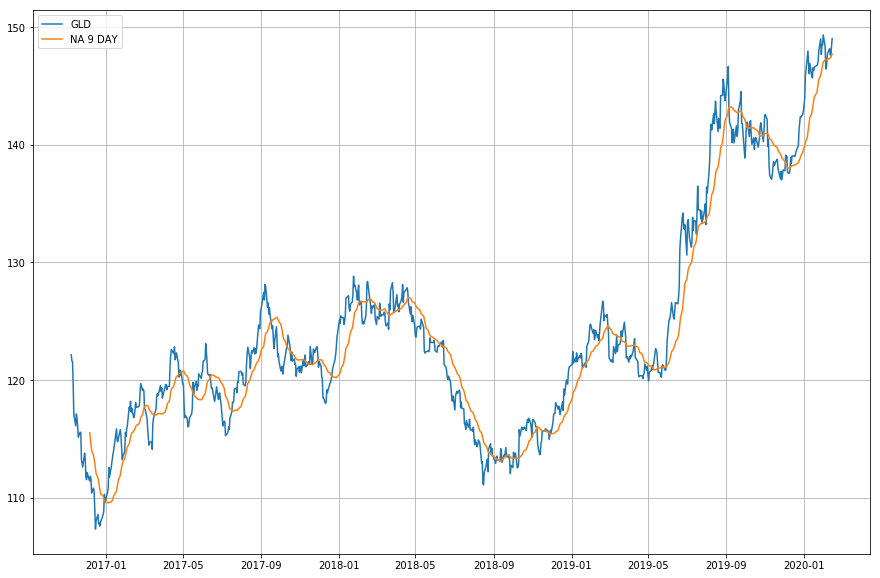

In [52]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(gld_close['Close'],label='GLD')
plt.plot(gld_close['MA_9'],label='NA 9 DAY')
plt.legend(loc=2)

In [53]:
gld_close['change']=np.log(gld_close['Close']/gld_close['Close'].shift())

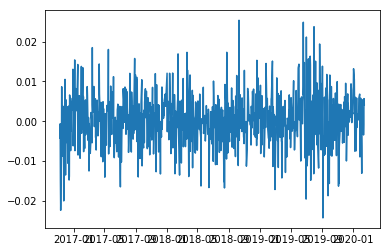

In [54]:
plt.plot(gld_close.change)

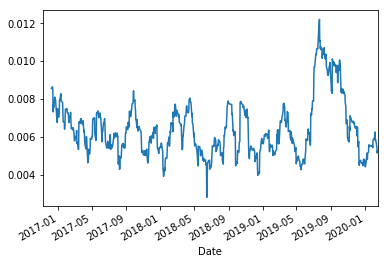

In [55]:
gld_close['Volatility']=gld_close.change.rolling(21).std().shift()
gld_close['Volatility'].plot()